In [12]:
# Import Libraries
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import loadtxt
import os, glob
import geopandas as gpd
import geojsonio
%matplotlib inline

In [13]:
# Import data_clean
data = pd.read_csv("data_clean.csv")

# Data Exploration

In [14]:
data.head(1)

,accommodates,amenities,availability_365,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,cleaning_fee,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,room_type,security_deposit,space,summary
0,1,"{""Cable TV"",Internet,Wifi,""Free street parking...",365,1.0,Real Bed,1.0,1.0,1,moderate,$0.00,...,9.0,8.0,9.0,9.0,8.0,0.26,Private room,$0.00,"The room is very large, private, cozy, bright,...","Private, bright and friendly room. You'd be sh..."


In [15]:
data.shape

(596908, 55)

In [16]:
# List correlation values
data.corr()

,accommodates,availability_365,bathrooms,bedrooms,beds,calculated_host_listings_count,guests_included,host_id,host_listings_count,id,...,number_of_reviews,number_of_reviews_ltm,price,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
accommodates,1.000000,0.187575,0.274383,0.633295,0.787913,0.191567,0.488204,0.007431,0.057031,-0.002274,...,0.134119,0.149805,0.125483,-0.053653,-0.023666,-0.001655,-0.031568,-0.046003,-0.096405,0.127590
availability_365,0.187575,1.000000,0.061258,0.073369,0.190582,0.255764,0.128472,0.032654,0.080316,-0.017487,...,0.256793,0.256613,0.103706,-0.046719,-0.007343,0.051212,-0.046247,-0.007789,-0.106452,0.231072
bathrooms,0.274383,0.061258,1.000000,0.329335,0.281510,0.056918,0.177825,0.004841,0.012896,0.009330,...,0.010386,0.012962,0.065099,-0.001554,0.005777,0.006995,0.003486,0.003483,-0.002638,0.008785
bedrooms,0.633295,0.073369,0.329335,1.000000,0.613510,0.042934,0.361029,-0.044163,0.012343,-0.065129,...,0.037270,0.024459,0.103672,-0.007859,0.011196,0.027504,0.008168,-0.012830,-0.016842,-0.004483
beds,0.787913,0.190582,0.281510,0.613510,1.000000,0.195501,0.425194,0.006709,0.067217,-0.027956,...,0.101771,0.109837,0.094404,-0.069670,-0.029092,-0.011892,-0.043157,-0.063510,-0.089851,0.088590
calculated_host_listings_count,0.191567,0.255764,0.056918,0.042934,0.195501,1.000000,0.120460,-0.000491,0.189633,0.083302,...,0.074531,0.103661,0.071258,-0.080198,-0.055434,-0.008927,-0.081079,-0.067646,-0.113233,0.113430
guests_included,0.488204,0.128472,0.177825,0.361029,0.425194,0.120460,1.000000,-0.007688,0.077806,-0.039076,...,0.116116,0.115529,0.096721,-0.016150,0.003114,0.022588,-0.004125,-0.017480,-0.050183,0.094066
host_id,0.007431,0.032654,0.004841,-0.044163,0.006709,-0.000491,-0.007688,1.000000,0.042091,0.548730,...,-0.126254,0.025755,0.040050,-0.034073,-0.019748,-0.027746,-0.038618,-0.011330,-0.017570,0.197847
host_listings_count,0.057031,0.080316,0.012896,0.012343,0.067217,0.189633,0.077806,0.042091,1.000000,0.039216,...,0.002666,0.004680,0.017429,-0.050743,-0.038389,-0.005777,-0.060487,-0.045521,-0.067755,0.059899
id,-0.002274,-0.017487,0.009330,-0.065129,-0.027956,0.083302,-0.039076,0.548730,0.039216,1.000000,...,-0.271078,-0.037131,0.033774,0.018198,0.015871,0.011979,0.016100,0.057021,0.034817,0.214035


In [30]:
data.groupby('neighbourhood').size()

neighbourhood
Adlershof                      665
Alsergrund                     845
Alt-Hohenschönhausen          1348
Alt-Treptow                   5351
Altglienicke                   497
Baumschulenweg                1943
Berliner Vorstadt                2
Biesdorf                       727
Blankenburg                    144
Blankenfelde                    10
Bohnsdorf                      171
Brigittenau                    509
Britz                         1940
Buch                           249
Buckow                         450
Charlottenburg               20981
Charlottenburg-Nord            484
Dahlem                         631
Donaustadt                     399
Döbling                        306
Falkenberg                      74
Falkenhagener Feld             212
Favoriten                      727
Fennpfuhl                     1860
Floridsdorf                    166
Französisch Buchholz           595
Friedenau                     2437
Friedrichsfelde               2083
Friedr

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


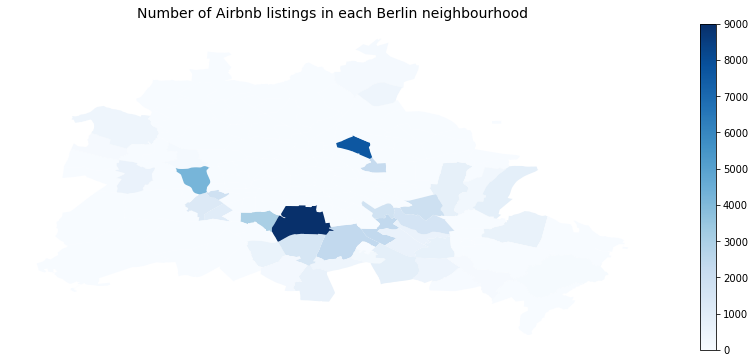

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


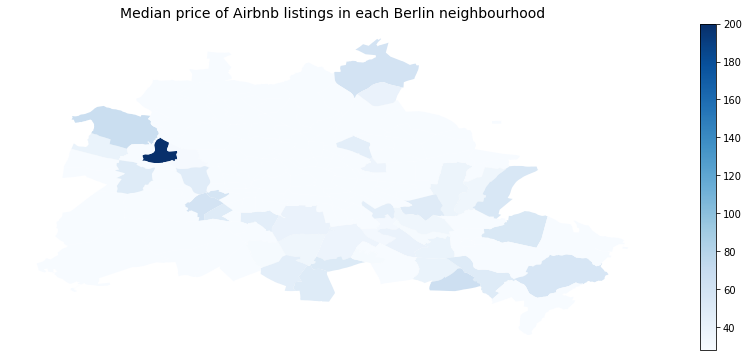

In [29]:
# Display contents of neighbourhoods.geojson visually (not working properly, ON HOLD)

# Load up the file
data_2019_12_11_neighb_geojson = gpd.read_file('data/2019-12-11/neighbourhoods.geojson')

# Dropping the redundant column
data_2019_12_11_neighb_geojson.drop('neighbourhood_group', axis=1, inplace=True)

# Creating a dataframe of listing counts and median price by borough
neighbourhood_df = pd.DataFrame(data.groupby('neighbourhood').size())
neighbourhood_df.rename(columns={0: 'number_of_listings'}, inplace=True)
neighbourhood_df['median_price'] = data.groupby('neighbourhood').price.median().values

# Joining the dataframes
neighbourhood_map_df = data_2019_12_11_neighb_geojson.set_index('neighbourhood').join(neighbourhood_df)

# Plotting the number of listings in each borough
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
neighbourhood_map_df.plot(column='number_of_listings', cmap='Blues', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each Berlin neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
neighbourhood_map_df.plot(column='median_price', cmap='Blues', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each Berlin neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(neighbourhood_map_df.median_price), vmax=max(neighbourhood_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()